# Week 13: Regression Inference

In [2]:
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Start off with some random scatter of data like last time. Goal is to figure out, **what is the true slope of the regression line for our data**



**Important: The true slope is not the same as the slope of the regression line for this data**


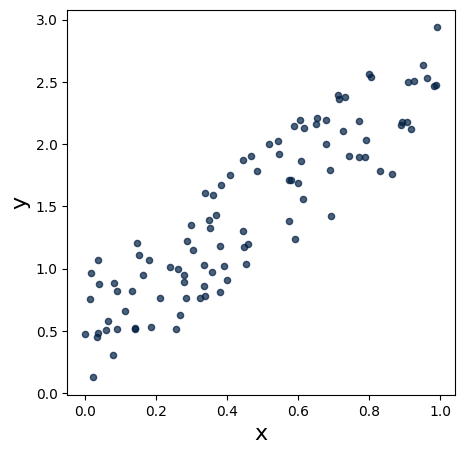

In [37]:
np.random.seed(48)
x = np.random.rand(100)
y = x * 2 + np.random.rand(100)

original_sample = Table().with_columns("x",x, "y", y)
original_sample.scatter("x", "y")

**Recap**

$m = \frac{r * std(y)}{std(x)}$

$b = mean(y) - m * mean(x)$

In [44]:
def calculate_r(x,y):
    x_standard = (x - np.mean(x)) / np.std(x)
    y_standard = (y - np.mean(y)) / np.std(y)
    r = np.mean(x_standard*y_standard)
    return r

def slope_intercept(x, y):
    r = calculate_r(x,y)
    m = (r * np.std(y)) / np.std(x)
    b = np.mean(y) - m * np.mean(x)
    return make_array(m, b)

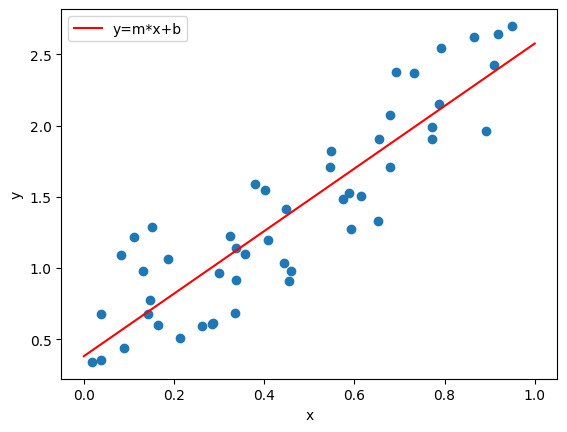

In [5]:
m, b = slope_intercept(x, y)

x_lin = np.linspace(0,1,100)
line =  m * x_lin + b
plt.plot(x_lin, line, '-r', label='y=m*x+b');
plt.scatter(x, y);
plt.xlabel("x");
plt.ylabel("y");
plt.legend();

**Remember, our original data points are coming from some distribution. We do not have direct access to that distribution but we want to know the true slope of the regression line for the distribution. We only have our original sample of data above. How can we build a confidence interval of slopes that give us infomation about where the true slope may lie? We bootstap!**

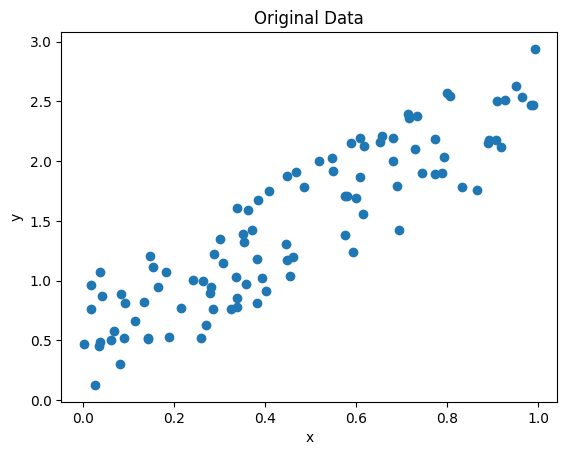

In [10]:
plt.scatter(x, y);
plt.xlabel("x");
plt.ylabel("y");
plt.title("Original Data");

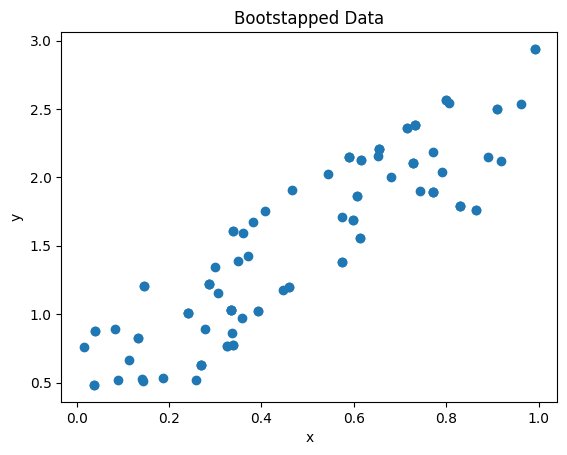

In [40]:
boot_sample = original_sample.sample()
plt.scatter(boot_sample.column("x"), boot_sample.column("y"))
plt.xlabel("x");
plt.ylabel("y");
plt.title("Bootstapped Data");

**For each of the bootstraps of our data, if we try to fit a line to the bootstapped data, we will get a different slope than from our original data.**

In [45]:
(m, b)

(2.1955623448345025, 0.38129200911878547)

In [43]:
# Notice how each time we bootstrap, the slope and intercept change
new_random = original_sample.sample()
slope_intercept(new_random.column("x"), new_random.column("y"))

(2.0034302849953223, 0.54449222183440726)

**Create a histogram of the different slope for 10000 bootstrapped sample**

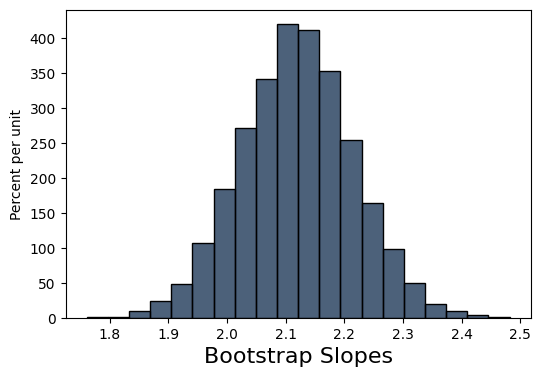

In [47]:
slopes = make_array()
for i in np.arange(10000):
    #use original_sample table
    bootstrap_sample = original_sample.sample()

    # use slope_intercept
    bootstrap_slope = slope_intercept(bootstrap_sample.column("x"), bootstrap_sample.column("y")).item(0)
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

**Find the 95% confidence interval and interpret the result in regards to the true slope**

In [48]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(1.9340905848037409, 2.3091561513192702)

Given that the process of creating the confidence interval is done correctly, we expect that if we repeated the process an infinite number of times, 95% of the intervals created in this manner would contain the **true** slope of the distribution.